In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn import datasets

In [42]:
def x2(x1, model, bais=0):
    y = -model.intercept_ - x1*model.coef_[0][0]+bais
    return y/model.coef_[0][1]

In [43]:
x, y = datasets.make_moons(noise=0.12)

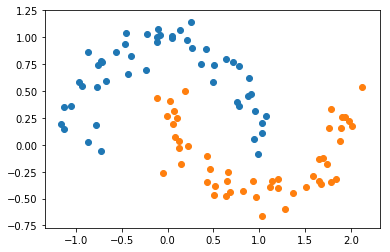

In [53]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [59]:
from sklearn.svm import LinearSVC
ls = LinearSVC(C=1)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [60]:
sc = StandardScaler()
pf = PolynomialFeatures(degree=2)
pf.fit(x)
xp = pf.transform(x)
sc.fit(xp)
xs = sc.transform(xp)
ls.fit(xs,y)#可以处理多分类问题

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [61]:
ls.score(xs,y)

0.87

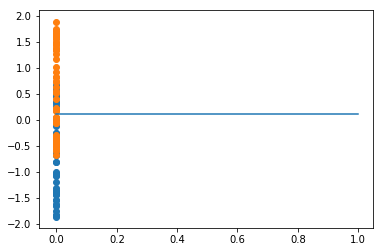

In [62]:
x1 = np.arange(2)
plt.scatter(xs[y==0,0], xs[y==0,1])
plt.scatter(xs[y==1,0], xs[y==1,1])

plt.plot(x1, x2(x1,ls))

In [63]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

# 使用多项式核函数

In [65]:
from sklearn.svm import SVC

In [69]:
ls = SVC(kernel="poly", degree=2)
sc = StandardScaler()
pf = PolynomialFeatures(degree=2)
pf.fit(x)
xp = pf.transform(x)
sc.fit(xp)
xs = sc.transform(xp)
ls.fit(xs,y)#可以处理多分类问题

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
ls.score(xs,y)

0.95